# ME:4111 Scientific Computing and Machine Learning 
# Lecture 2: Python Programming - Pandas

### Import pandas library 

In [1]:
import pandas as pd
import numpy as np

### import our datafile mpg.csv, which contains fuel economy data for 234 cars.
##### mpg : miles per gallon;
##### class : car classification;
##### cty : city mpg;
##### cyl : # of cylinders;
##### displ : engine displacement in liters;
##### drv : f = front-wheel drive, r = rear wheel drive, 4 = 4wd;
##### fl : fuel (e = ethanol E85, d = diesel, r = regular, p = premium, c = CNG);
##### hwy : highway mpg;
##### manufacturer : automobile manufacturer;
##### model : model of car;
##### trans : type of transmission;
##### year : model year.

In [2]:
mpg = pd.read_csv('mpg.csv')
mpg.head(20) # show the first ten rows

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [3]:
mpg['cty']

0      18
1      21
2      20
3      21
4      16
       ..
229    19
230    21
231    16
232    18
233    17
Name: cty, Length: 234, dtype: int64

###  Basic data information

In [4]:
#print(mpg['hwy'])
mpg['hwy']


0      29
1      29
2      31
3      30
4      26
       ..
229    28
230    29
231    26
232    26
233    26
Name: hwy, Length: 234, dtype: int64

###  find the average hwy fuel economy across all cars.

In [8]:
avghwy=np.mean(mpg['hwy'])
print('The average hwy fuel economy is', avghwy, 'mpg.')

The average hwy fuel economy is 23.44017094017094 mpg.


### return the unique values for the number of cylinders the cars in our dataset have

In [13]:
cylinders = set(mpg['cyl'])
print(cylinders)

{8, 4, 5, 6}


In [ ]:
### find the average cty mpg of 4-clinder cars

In [12]:

cyl = mpg['cyl']
CtyMpg = mpg['cty']

summpg = 0
cyltypecount = 0
for i in range(0, len(mpg), 1): # iterate over all cars
    if cyl[i] == 4: # if the cylinder == 4 ,
        summpg += CtyMpg[i] # add the cty mpg
        cyltypecount += 1 # increment the count

if cyltypecount>0:
    Cty_Ave_Mpg = summpg/cyltypecount
    print(Cty_Ave_Mpg)
else:
    print(" no such cars")


    

21.012345679012345


In [14]:
np.mean(mpg['cty'][ mpg['cyl']==4 ])


21.012345679012345

### Write a function to compute the average city mpg for a group of cars (by make, year, etc)

In [15]:
import numpy as np

def cty_mpg(key,kind):
    CtyMpg = mpg['cty']
    sub_city_mpg = CtyMpg[ mpg[key]== kind]
    return np.mean(sub_city_mpg)
    

        

In [17]:

 cty_mpg('manufacturer','ford')

14.0

In [101]:
mpg['year']

0      1999
1      1999
2      2008
3      2008
4      1999
       ... 
229    2008
230    2008
231    1999
232    1999
233    2008
Name: year, Length: 234, dtype: int64

In [102]:
make = set(mpg['manufacturer'])
mpgbymake = dict()
for manuf in make:
    x= cty_mpg('manufacturer',manuf)
    mpgbymake[manuf]= x

In [103]:
mpgbymake.items()

dict_items([('pontiac', 17.0), ('jeep', 13.5), ('chevrolet', 15.0), ('hyundai', 18.642857142857142), ('nissan', 18.076923076923077), ('toyota', 18.529411764705884), ('mercury', 13.25), ('land rover', 11.5), ('lincoln', 11.333333333333334), ('volkswagen', 20.925925925925927), ('subaru', 19.285714285714285), ('honda', 24.444444444444443), ('dodge', 13.135135135135135), ('audi', 17.61111111111111), ('ford', 14.0)])

In [107]:
mpgbymake.values()

dict_values([17.0, 13.5, 15.0, 18.642857142857142, 18.076923076923077, 18.529411764705884, 13.25, 11.5, 11.333333333333334, 20.925925925925927, 19.285714285714285, 24.444444444444443, 13.135135135135135, 17.61111111111111, 14.0])

Text(0, 0.5, 'City MPG')

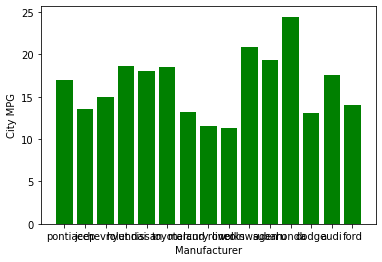

In [109]:
import matplotlib.pyplot as plt
makes = mpgbymake.keys()
ctympg = mpgbymake.values()
plt.bar(makes,ctympg, color ='green')
plt.xlabel("Manufacturer")
plt.ylabel("City MPG")